# Libraries import

In [241]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt 
import itertools as it
from pandas.api.types import CategoricalDtype
plt.close("all")


# Data import

In [186]:
test = pd.read_csv(r"C:\Users\rafal\Documents\python\Big-Mart-Sales\Test-Set.csv")
train = pd.read_csv(r"C:\Users\rafal\Documents\python\Big-Mart-Sales\Train-Set.csv")

## Exploratory Analysis

### Context

The data scientists at Big Mart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, Big Mart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

### Variable description

As we can see in the dataframes below, there are 11 columns in each subset plus 1 column with outlet sales in the train set. 

- **ProductID** : unique product ID
- **Weight** : weight of products
- **FatContent** : specifies whether the product is low on fat or not
- **Visibility** : percentage of total display area of all products in a store allocated to the particular product
- **ProductType** : the category to which the product belongs
- **MRP** : Maximum Retail Price (listed price) of the products
- **OutletID** : unique store ID
- **EstablishmentYear** : year of establishment of the outlets
- **OutletSize** : the size of the store in terms of ground area covered
- **LocationType** : the type of city in which the store is located
- **OutletType** : specifies whether the outlet is just a grocery store or some sort of supermarket
- **OutletSales** : (target variable) sales of the product in the particular store

In [187]:
test.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [188]:
test.shape

(5681, 11)

In [189]:
train.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [190]:
train.shape

(8523, 12)

In [191]:
# train data persentage
train.shape[0] / (test.shape[0] + train.shape[0])

0.6000422416220783

The dataset has 60% of training data and 40% of test data.

In [192]:
train.dtypes

ProductID             object
Weight               float64
FatContent            object
ProductVisibility    float64
ProductType           object
MRP                  float64
OutletID              object
EstablishmentYear      int64
OutletSize            object
LocationType          object
OutletType            object
OutletSales          float64
dtype: object

Data types are mostly of type "object" while all of them are in fact of type "category" (ProductID, FatContent, ProductType, OutletID, OutletSize, LocationType and OutletType). Therefore, in the next step the data type will be changed.

In [193]:
train[["ProductID", "FatContent", "ProductType", "OutletID", "OutletSize", "LocationType", "OutletType", "EstablishmentYear"]] = train[["ProductID", "FatContent", "ProductType", "OutletID", "OutletSize", "LocationType", "OutletType", "EstablishmentYear"]].apply(lambda x: x.astype('category'))
test[["ProductID", "FatContent", "ProductType", "OutletID", "OutletSize", "LocationType", "OutletType", "EstablishmentYear"]] = test[["ProductID", "FatContent", "ProductType", "OutletID", "OutletSize", "LocationType", "OutletType", "EstablishmentYear"]].apply(lambda x: x.astype('category'))

In [194]:
train.dtypes

ProductID            category
Weight                float64
FatContent           category
ProductVisibility     float64
ProductType          category
MRP                   float64
OutletID             category
EstablishmentYear    category
OutletSize           category
LocationType         category
OutletType           category
OutletSales           float64
dtype: object

### Plots
#### Categorical variables

<AxesSubplot:>

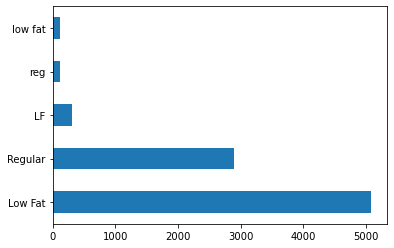

In [195]:
train['FatContent'].value_counts().plot(kind='barh')

<AxesSubplot:>

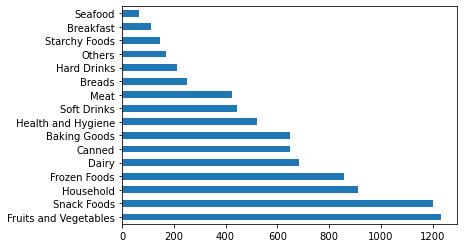

In [196]:
train['ProductType'].value_counts().plot(kind='barh')

<AxesSubplot:>

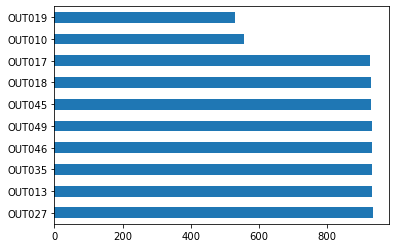

In [197]:
train['OutletID'].value_counts().plot(kind='barh')

<AxesSubplot:>

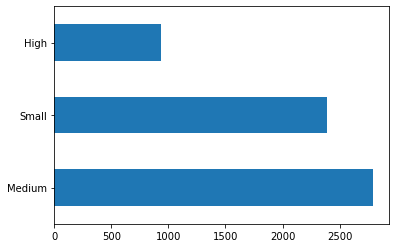

In [198]:
train['OutletSize'].value_counts().plot(kind='barh')

<AxesSubplot:>

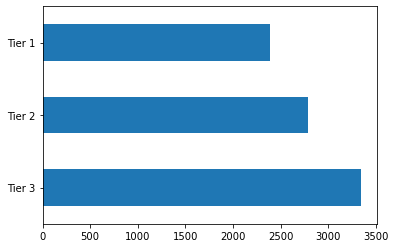

In [199]:
train['LocationType'].value_counts().plot(kind='barh')

<AxesSubplot:>

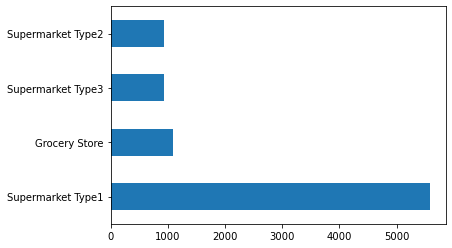

In [200]:
train['OutletType'].value_counts().plot(kind='barh')

<AxesSubplot:>

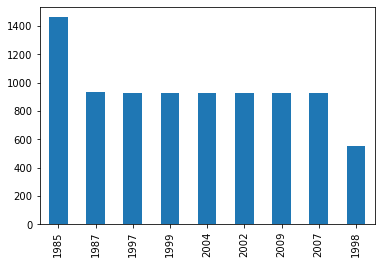

In [201]:
train['EstablishmentYear'].value_counts().plot(kind='bar')

You can see in the plots, that some of the variables have more category levels than needed (some levels overlap): **FatContent** has 5 categories in the dataset, but in fact there are only 2. Levels *low fat*, *Low Fat* and *LF* will be joined into one category *Low Fat*. Accordingly, *reg* and *Regular* levels will be joined into *Regular*. Variable **OutletSize** should be ordered, because *High* > *Medium* > *Small*. Also *EstablishmentYear* levels will be sorted.

In [202]:
# joining categories
train.loc[train['FatContent'] == "low fat", "FatContent"] = "Low Fat"
train.loc[train['FatContent'] ==  "LF", "FatContent"] = "Low Fat"
train.loc[train['FatContent'] ==  "reg", "FatContent"] = "Regular"

# setting proper category levels
train['FatContent'] = train['FatContent'].astype(CategoricalDtype(categories=['Low Fat', 'Regular'], ordered=False))

# joining categories
test.loc[train['FatContent'] == "low fat", "FatContent"] = "Low Fat"
test.loc[train['FatContent'] ==  "LF", "FatContent"] = "Low Fat"
test.loc[train['FatContent'] ==  "reg", "FatContent"] = "Regular"

# setting proper category levels
test['FatContent'] = test['FatContent'].astype(CategoricalDtype(categories=['Low Fat', 'Regular'], ordered=False))

In [203]:
train['FatContent']

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: FatContent, Length: 8523, dtype: category
Categories (2, object): ['Low Fat', 'Regular']

In [204]:
# reordering levels
train['OutletSize'] = train['OutletSize'].astype(CategoricalDtype(categories=['Small', 'Medium', 'High'], ordered=True))
test['OutletSize'] = test['OutletSize'].astype(CategoricalDtype(categories=['Small', 'Medium', 'High'], ordered=True))


# reordering levels
train['EstablishmentYear'] = train['EstablishmentYear'].astype(CategoricalDtype(categories=[1985, 1987, 1997, 1999, 1998, 2002, 2004, 2007, 2009], ordered=True))
test['EstablishmentYear'] = test['EstablishmentYear'].astype(CategoricalDtype(categories=[1985, 1987, 1997, 1999, 1998, 2002, 2004, 2007, 2009], ordered=True))

In [205]:
train['OutletSize']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: OutletSize, Length: 8523, dtype: category
Categories (3, object): ['Small' < 'Medium' < 'High']

In [206]:
train['EstablishmentYear']

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: EstablishmentYear, Length: 8523, dtype: category
Categories (9, int64): [1985 < 1987 < 1997 < 1999 ... 2002 < 2004 < 2007 < 2009]

<AxesSubplot:>

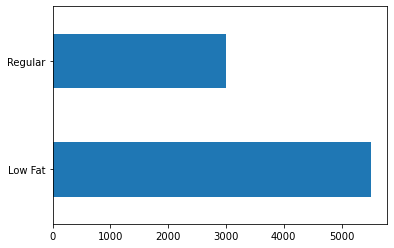

In [207]:
train['FatContent'].value_counts().plot(kind='barh')

<AxesSubplot:>

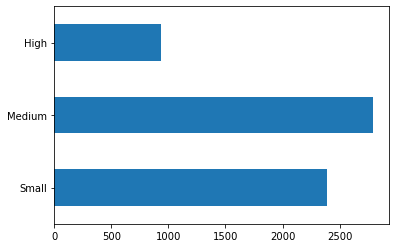

In [219]:
train['OutletSize'].value_counts().reindex(['Small','Medium','High']).plot(kind="barh")

<AxesSubplot:>

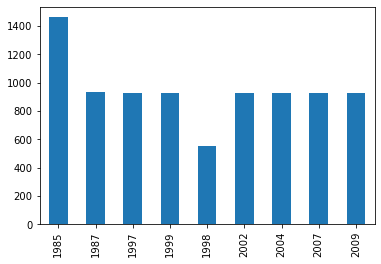

In [220]:
train['EstablishmentYear'].value_counts().reindex([1985, 1987, 1997, 1999, 1998, 2002, 2004, 2007, 2009]).plot(kind='bar')

#### Continuous variables

<Figure size 432x288 with 0 Axes>

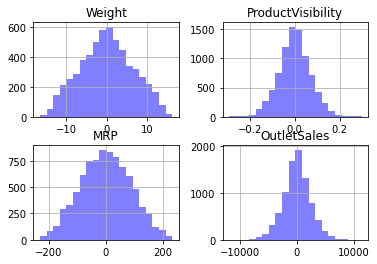

In [210]:
plt.figure();
train[['Weight', 'ProductVisibility', 'MRP', 'OutletSales']].diff().hist(color="b", alpha=0.5, bins=20);

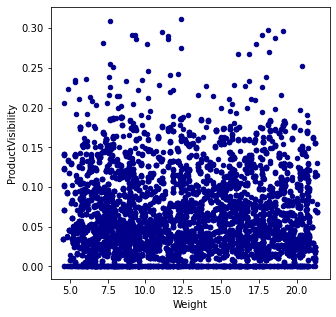

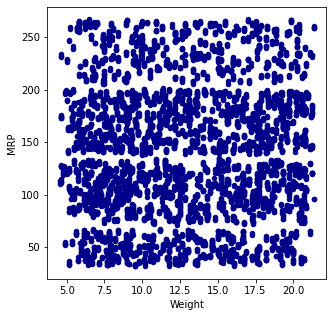

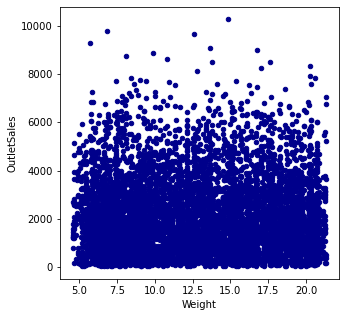

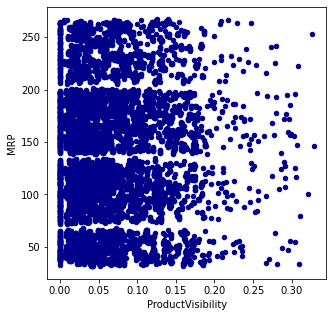

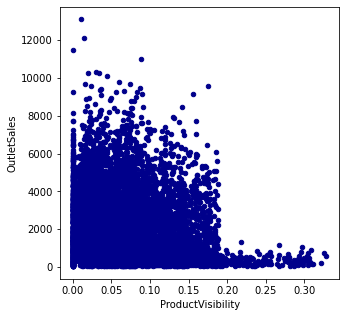

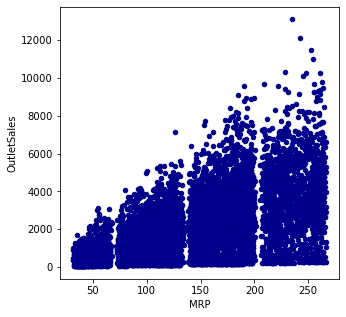

In [308]:
ContCols = train.select_dtypes(include=['float64'])

for combination in it.combinations(ContCols, 2):
    train.plot.scatter(x=combination[0], y=combination[1], color="DarkBlue", subplots=True, figsize = (5,5))

In the plots above we can see, that the continuous variables are probably not related to each other, maybe except for *OuterSales* and *ProductVisibility* as well as *OuterSales* and *MRP* - this is to be checked.